# Deep Lizard Tensorflow and Keras Tutorial

## Dogs vs Cats!

In [1]:
import numpy as np
from random import seed, sample
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

seed(42)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline

import shutil
import glob

2021-09-04 18:21:46.185330: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-04 18:21:46.185364: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


ImportError: cannot import name 'Flatten' from 'tensorflow.keras.models' (/home/omar/Coding/AI/AI-utils/env/lib/python3.8/site-packages/keras/api/_v2/keras/models/__init__.py)

### Data Preparation

In [28]:
os.chdir("data")
if(os.path.isdir("train/dog") is False):
    os.makedirs("train/dog")
    os.makedirs("valid/dog")
    os.makedirs("test/dog")
    os.makedirs("train/cat")
    os.makedirs("valid/cat")
    os.makedirs("test/cat")

    for c in sample(glob.glob("cat*"), 500):
        shutil.move(c, "train/cat")
    for c in sample(glob.glob("dog*"), 500):
        shutil.move(c, "train/dog")
    for c in sample(glob.glob("cat*"), 100):
        shutil.move(c, "valid/cat")
    for c in sample(glob.glob("dog*"), 100):
        shutil.move(c, "valid/dog")
    for c in sample(glob.glob("cat*"), 50):
        shutil.move(c, "test/cat")
    for c in sample(glob.glob("dog*"), 50):
        shutil.move(c, "test/dog")
os.chdir("..")

In [29]:
source = "data/"
train_path = source+"train/"
valid_path = source+"valid/"
test_path  = source+"test/"

In [31]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [32]:
imgs, labels = next(train_batches)

In [33]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

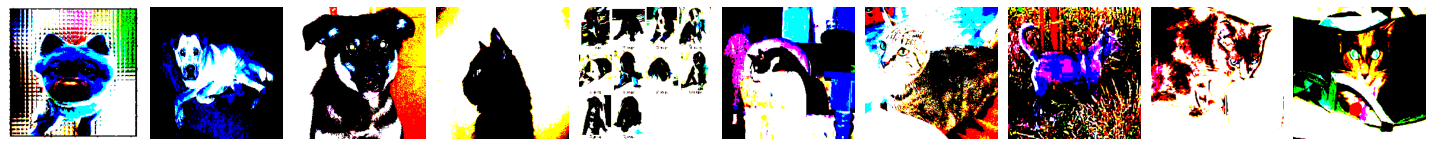

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [34]:
plotImages(imgs)
print(labels)

 ### Building a CNN

In [35]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
________________________________________________

In [37]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [38]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10


2021-08-22 18:15:06.225017: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 64225280 exceeds 10% of free system memory.
2021-08-22 18:15:06.273655: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 32112640 exceeds 10% of free system memory.
2021-08-22 18:15:06.332652: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 32112640 exceeds 10% of free system memory.
2021-08-22 18:15:06.387068: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 28901376 exceeds 10% of free system memory.
2021-08-22 18:15:06.544349: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 32112640 exceeds 10% of free system memory.


100/100 - 30s - loss: 11.5841 - accuracy: 0.5730 - val_loss: 6.5606 - val_accuracy: 0.5450
Epoch 2/10
100/100 - 31s - loss: 2.1470 - accuracy: 0.7610 - val_loss: 3.3810 - val_accuracy: 0.6350
Epoch 3/10
100/100 - 41s - loss: 0.6610 - accuracy: 0.8870 - val_loss: 2.7116 - val_accuracy: 0.6100
Epoch 4/10
100/100 - 35s - loss: 0.0994 - accuracy: 0.9670 - val_loss: 2.8438 - val_accuracy: 0.5950
Epoch 5/10
100/100 - 35s - loss: 0.0564 - accuracy: 0.9800 - val_loss: 2.4483 - val_accuracy: 0.6450
Epoch 6/10
100/100 - 35s - loss: 0.0131 - accuracy: 0.9960 - val_loss: 2.5278 - val_accuracy: 0.6250
Epoch 7/10
100/100 - 35s - loss: 0.0067 - accuracy: 0.9980 - val_loss: 2.3882 - val_accuracy: 0.6250
Epoch 8/10
100/100 - 35s - loss: 7.1883e-04 - accuracy: 1.0000 - val_loss: 2.3418 - val_accuracy: 0.6250
Epoch 9/10
100/100 - 34s - loss: 4.4676e-04 - accuracy: 1.0000 - val_loss: 2.3336 - val_accuracy: 0.6200
Epoch 10/10
100/100 - 32s - loss: 3.6241e-04 - accuracy: 1.0000 - val_loss: 2.3292 - val_accu

### Predictions

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

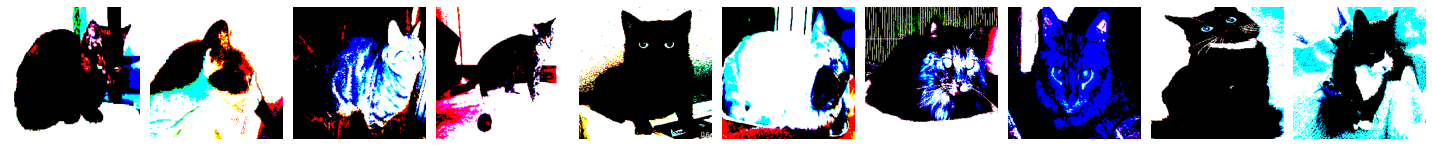

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [46]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [40]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [41]:
predictions = model.predict(x=test_batches, verbose=0)

In [42]:
np.round(predictions)

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.

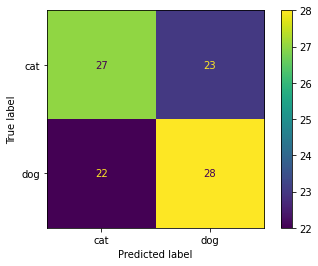

In [47]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot_labels = ["cat", "dog"]
result = ConfusionMatrixDisplay(cm, display_labels=cm_plot_labels)
result.plot()


### VGG16 model fine tuning

In [48]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [49]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

#### Block every layer except the last one

In [50]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [51]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [52]:
for layer in model.layers:
    layer.trainable = False

In [53]:
model.add(Dense(units=2, activation="softmax"))

In [54]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [55]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [56]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=5, verbose=2)

Epoch 1/5
100/100 - 235s - loss: 0.3408 - accuracy: 0.8520 - val_loss: 0.1586 - val_accuracy: 0.9500
Epoch 2/5
100/100 - 226s - loss: 0.1107 - accuracy: 0.9610 - val_loss: 0.1193 - val_accuracy: 0.9600
Epoch 3/5
100/100 - 222s - loss: 0.0764 - accuracy: 0.9740 - val_loss: 0.1120 - val_accuracy: 0.9600
Epoch 4/5
100/100 - 213s - loss: 0.0567 - accuracy: 0.9850 - val_loss: 0.1083 - val_accuracy: 0.9600
Epoch 5/5
100/100 - 213s - loss: 0.0424 - accuracy: 0.9890 - val_loss: 0.1161 - val_accuracy: 0.9600


### Predict using fine-tuned VGG16

In [57]:
predictions = model.predict(x=test_batches, verbose=0)

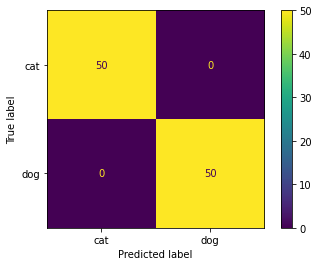

In [58]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot_labels = ["cat", "dog"]
result = ConfusionMatrixDisplay(cm, display_labels=cm_plot_labels)
result.plot()
